# Teste Modelo aclopado

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian
import warnings
import modelos_epidemiologicos as model #

### leitura dos dados

In [2]:
df0= pd.read_parquet("/home/akel/PycharmProjects/Endemic_model/brainstorms/caso_full.parquet")
df0['date']=pd.to_datetime(df0['date'],format='%Y-%m-%d')
dfbel= df0[(df0["city"] == "Belém") & (df0['state']=='PA') ]

### Visualização previa

(18353.0, 18474.0)

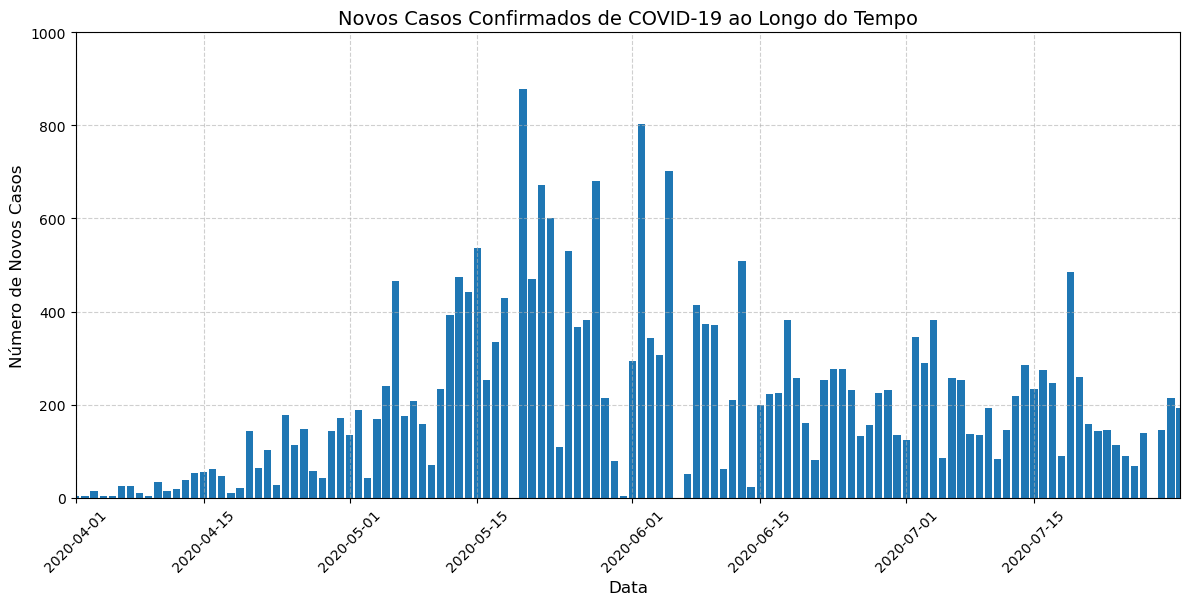

In [3]:
plt.figure(figsize=(12, 6))  # Tamanho do gráfico

plt.bar(dfbel['date'].values,dfbel['new_confirmed'].values)

# Formatação do gráfico
plt.title('Novos Casos Confirmados de COVID-19 ao Longo do Tempo', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Novos Casos', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor legibilidade
plt.grid(True, linestyle='--', alpha=0.6)  # Adiciona grid
plt.tight_layout()
plt.ylim([0,1000])
plt.xlim(pd.to_datetime(['2020-04-01', '2020-07-31'])) 

In [4]:
dfbel['new_confirmed'].iloc[0:120]
dfbel['date'].iloc[0:120]

1668421   2020-03-18
1668423   2020-03-19
1668425   2020-03-20
1668427   2020-03-21
1668429   2020-03-22
             ...    
1679957   2020-07-11
1680103   2020-07-12
1680249   2020-07-13
1680395   2020-07-14
1680541   2020-07-15
Name: date, Length: 120, dtype: datetime64[ns]

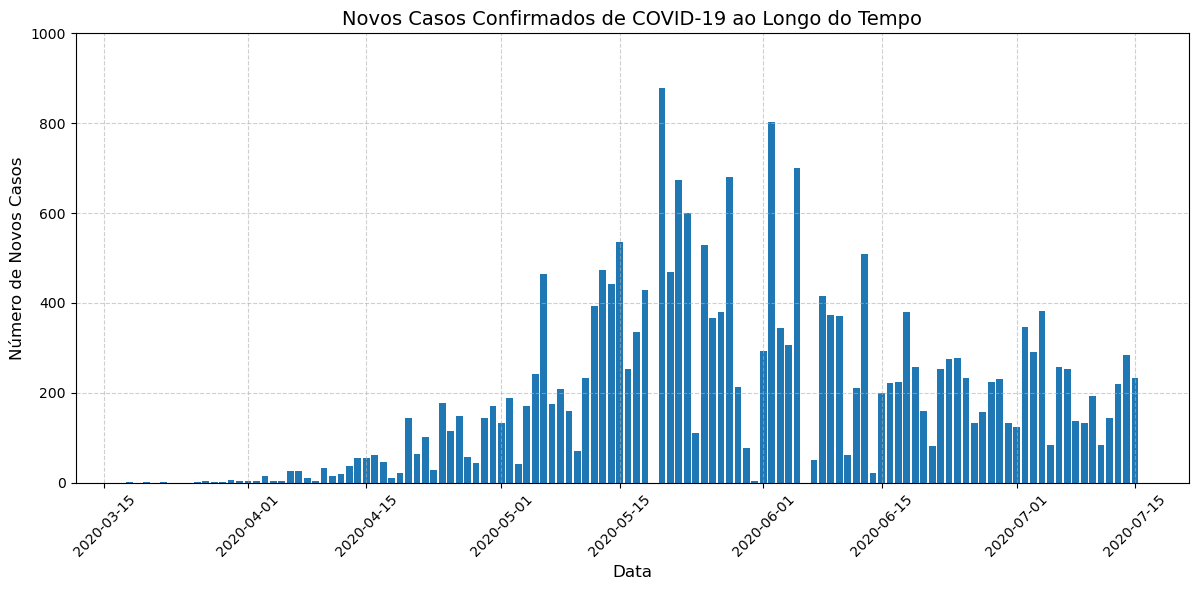

In [5]:
plt.figure(figsize=(12, 6))  # Tamanho do gráfico

plt.bar(dfbel['date'].iloc[0:120],dfbel['new_confirmed'].iloc[0:120])



# Formatação do gráfico
plt.title('Novos Casos Confirmados de COVID-19 ao Longo do Tempo', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Novos Casos', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor legibilidade
plt.grid(True, linestyle='--', alpha=0.6)  # Adiciona grid
plt.tight_layout()
plt.ylim([0,1000])
c=dfbel['new_confirmed'].iloc[0:120]

In [6]:
plt.plot(t,c)

def model_sir(t, N, R, beta,gamma):
    y0 = N-15, 15, R
    out = odeint(model.SIR, y0, t, args=(N, beta, gamma))
    S, I, R = out.T
    return I
    
mod = lmfit.Model(model_sir)


mod.set_param_hint("N", value=100, vary=True) #
mod.set_param_hint("R", value=1, vary=True) #
mod.set_param_hint("beta", value=1, vary=True) #
mod.set_param_hint("gamma", value=1, vary=True) #


#estimador de paramentros
params = mod.make_params()

#parametros do modelo
t=np.linspace(0,119,120)
out = mod.fit(c, params, method="leastsq", t=t)  # fittin
N1=out.values['N']
R1=out.values['R']
beta1=out.values['beta']
gamma1=out.values['gamma']


plt.plot(t,model_sir(t, N1, R1, beta1,gamma1),'--')


    



NameError: name 't' is not defined

In [ ]:
c=dfbel['new_confirmed'].iloc[0:120]
t=np.linspace(0,119,120)
print(c.size)

In [ ]:
beta1=out.values['beta']


In [ ]:
# Define the SIR model differential equations
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Wrapper function for lmfit
def model_sir(t, N, beta, gamma, I0):
    # Initial conditions: S0 = N-I0, I0, R0=0
    y0 = [N-I0, I0, 0]
    out = odeint(sir_model, y0, t, args=(N, beta, gamma))
    S, I, R = out.T
    return I

# Create lmfit model
mod = lmfit.Model(model_sir)

# Set parameter hints with realistic bounds
mod.set_param_hint("N", value=1000, min=100, max=1e6)  # Total population
mod.set_param_hint("beta", value=0.2, min=0.001, max=2)  # Infection rate
mod.set_param_hint("gamma", value=0.1, min=0.001, max=1)  # Recovery rate
mod.set_param_hint("I0", value=15, min=1, max=1000)  # Initial infected

# Create parameters
params = mod.make_params()

# Time points (days)
t = np.linspace(0, 119, 120)

# Fit the model to your data (replace 'c' with your actual case data)
result = mod.fit(c, params, method="leastsq", t=t)

# Print the fit report
print(result.fit_report())

# Plot results
import matplotlib.pyplot as plt
plt.plot(t, c, 'o', label='Data')
plt.plot(t, result.best_fit, '-', label='Fit')
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.show()